In [1]:
import nbsetup
import numpy as np
import seaborn as sns
import pandas as pd
import ensemblepy as ep
import matplotlib.pyplot as plt

In [105]:
def compare(mode, samples=range(100,3000,100), trials=100):
    data = []
    for t in range(trials):
        for sam in samples:
            if mode == 'min': # min
                xdist = np.random.uniform(0,1,sam)
                ydist = np.random.uniform(0,1,sam)
            elif mode == 'max': # max
                xdist = np.linspace(0,1,sam)
                ydist = xdist
            elif mode == 'circle':
                xdist = np.random.uniform(0,1,sam)
                ydist = np.sin(xdist*np.pi)
            elif mode == 'noisy':
                xdist = np.random.uniform(0,1,sam)
                ydist = np.sin(xdist*np.pi) + np.random.normal(0, 0.5, sam)
            
            for d in (True, False):
                c = ep.Correlation(xdist, ydist, discrete=d).incoherence
                if not d:
                    c *= 2
                data.append({
                    'observations': sam,
                    'incoherence': c,
                    'kind': 'discrete' if d else 'continuous'
                })
    
    sns.lineplot(data=pd.DataFrame(data), x='observations', y='incoherence', hue='kind').set(ylim=(0,1.1))
    sns.lineplot(x=[samples[0], samples[-1]], y=[0.07,0.07], linestyle='dotted', color='lightgrey')

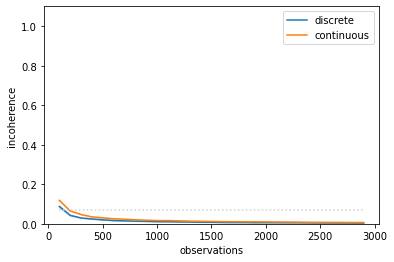

In [106]:
compare('min')

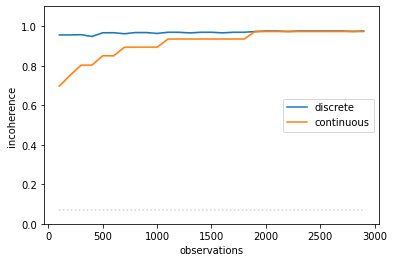

In [107]:
compare('max')

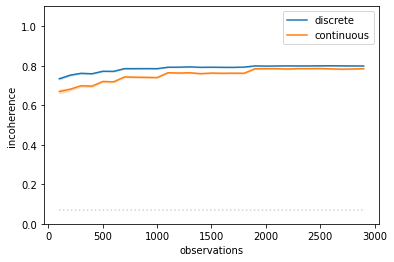

In [108]:
compare('circle')

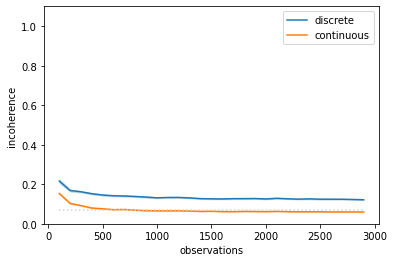

In [109]:
compare('noisy')

In [102]:
def compare_noise(sam, noise=np.linspace(0, 2.0,20), trials=100):
    data = []
    for t in range(trials):
        for n in noise:
            xdist = np.random.uniform(0,1,sam)
            ydist = np.sin(xdist*np.pi) + np.random.normal(0, n, sam)
            
            for d in (True, False):
                c = ep.Correlation(xdist, ydist, discrete=d).incoherence
                if not d:
                    c *= 2
                data.append({
                    'noise': n,
                    'incoherence': c,
                    'kind': 'discrete' if d else 'continuous'
                })
        
    sns.lineplot(data=pd.DataFrame(data), x='noise', y='incoherence', hue='kind').set(ylim=(0,1.0))
    sns.lineplot(x=[noise[0], noise[-1]], y=[0.07,0.07], linestyle='dotted', color='lightgrey')

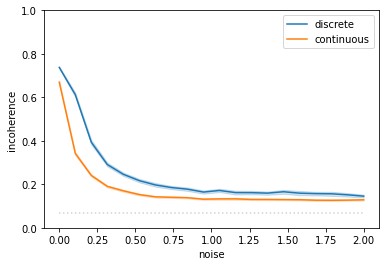

In [101]:
compare_noise(100)

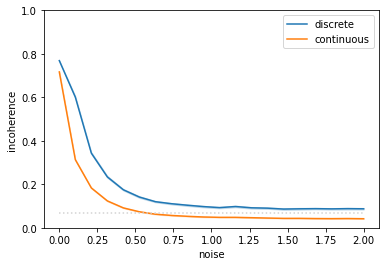

In [103]:
compare_noise(500)

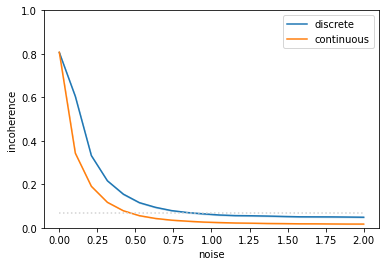

In [104]:
compare_noise(3000)

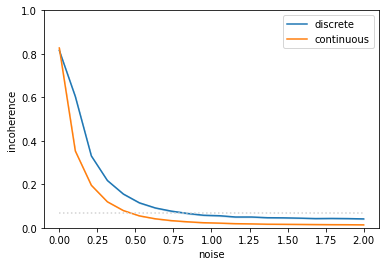

In [111]:
compare_noise(5000)